In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [64]:
ls

 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\project excelr

02/12/2023  11:58 AM    <DIR>          .
02/12/2023  11:58 AM    <DIR>          ..
02/12/2023  11:46 AM    <DIR>          .ipynb_checkpoints
02/12/2023  11:49 AM    <DIR>          arya project
01/24/2023  09:31 AM            43,596 Business_Requirement (1).docx.pdf
01/24/2023  09:29 AM           480,038 Churn.csv
02/09/2023  03:48 PM         1,245,864 Churn_Customer_monika.ipynb
02/12/2023  11:58 AM           159,603 churn_kuldeep.ipynb
02/02/2023  03:49 PM           297,635 Churn_Project.ipynb
02/02/2023  04:49 PM           530,671 Feature Engineering.ipynb
02/04/2023  03:26 PM             9,365 group-06.xlsx
02/04/2023  03:18 PM           908,263 group-6-EDA.pptx
01/30/2023  11:31 AM         9,271,012 Project Pre-Processing_shiva.ipynb
01/30/2023  05:30 PM           518,871 Project-1.2.pptx
01/30/2023  11:37 AM         1,401,106 Project-1.pptx
        

In [65]:
churn1=pd.read_csv("churn.csv")

In [66]:
churn1.head(3)

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no


In [67]:
churn2=churn1.drop("Unnamed: 0",axis=1)
churn3=churn2.drop("state",axis=1)
churn4=churn3.drop("area.code",axis=1)

In [68]:
churn4.head(3)

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no


In [69]:
churn4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  5000 non-null   int64  
 1   voice.plan      5000 non-null   object 
 2   voice.messages  5000 non-null   int64  
 3   intl.plan       5000 non-null   object 
 4   intl.mins       5000 non-null   float64
 5   intl.calls      5000 non-null   int64  
 6   intl.charge     5000 non-null   float64
 7   day.mins        5000 non-null   float64
 8   day.calls       5000 non-null   int64  
 9   day.charge      5000 non-null   object 
 10  eve.mins        5000 non-null   object 
 11  eve.calls       5000 non-null   int64  
 12  eve.charge      5000 non-null   float64
 13  night.mins      5000 non-null   float64
 14  night.calls     5000 non-null   int64  
 15  night.charge    5000 non-null   float64
 16  customer.calls  5000 non-null   int64  
 17  churn           5000 non-null   o

In [75]:
churn4['eve.mins']=pd.to_numeric(churn4['eve.mins'],errors='coerce')
churn4['day.charge']=pd.to_numeric(churn4['day.charge'],errors='coerce')

churn4.dropna(axis=0,inplace=True)
churn4.shape

(4969, 18)

In [76]:
#churn4.replace("Nan", float("nan"), inplace=False)



In [77]:
churn4.dropna(inplace=True)

In [78]:
churn4.head(3)

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no


In [79]:
lb=LabelEncoder()

In [80]:
churn4["intl.plan"]=lb.fit_transform(churn4["intl.plan"])

churn4["voice.plan"]=lb.fit_transform(churn4["voice.plan"])
churn4["churn"]=lb.fit_transform(churn4["churn"])

In [81]:
churn4.head(3)

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0


In [82]:
churn4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  4969 non-null   int64  
 1   voice.plan      4969 non-null   int32  
 2   voice.messages  4969 non-null   int64  
 3   intl.plan       4969 non-null   int32  
 4   intl.mins       4969 non-null   float64
 5   intl.calls      4969 non-null   int64  
 6   intl.charge     4969 non-null   float64
 7   day.mins        4969 non-null   float64
 8   day.calls       4969 non-null   int64  
 9   day.charge      4969 non-null   float64
 10  eve.mins        4969 non-null   float64
 11  eve.calls       4969 non-null   int64  
 12  eve.charge      4969 non-null   float64
 13  night.mins      4969 non-null   float64
 14  night.calls     4969 non-null   int64  
 15  night.charge    4969 non-null   float64
 16  customer.calls  4969 non-null   int64  
 17  churn           4969 non-null   i

In [83]:


'''


churn4['day.charge'] = pd.to_numeric(churn4['day.charge'], errors='coerce')
churn4['eve.mins'] = pd.to_numeric(churn4['day.mins'], errors='coerce')

churn4 = churn4.astype(int)
print(churn4.dtypes)
'''

"\n\n\nchurn4['day.charge'] = pd.to_numeric(churn4['day.charge'], errors='coerce')\nchurn4['eve.mins'] = pd.to_numeric(churn4['day.mins'], errors='coerce')\n\nchurn4 = churn4.astype(int)\nprint(churn4.dtypes)\n"

In [84]:
churn4["all_mins"]=churn4["day.mins"]+churn4["eve.mins"]+churn4["night.mins"]

In [85]:
churn4["all_calls"]=churn4["day.calls"]+churn4["eve.calls"]+churn4["night.calls"]

In [86]:
churn4["all_charge"]=churn4["day.charge"]+churn4["eve.charge"]+churn4["night.charge"]

In [87]:
churn4

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,...,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,all_mins,all_calls,all_charge
0,128,1,25,0,10.0,3,2.70,265.1,110,45.07,...,99,16.78,244.7,91,11.01,1,0,707.2,300,72.86
1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,...,103,16.62,254.4,103,11.45,1,0,611.5,329,55.54
2,137,0,0,0,12.2,5,3.29,243.4,114,41.38,...,110,10.30,162.6,104,7.32,0,0,527.2,328,59.00
3,84,0,0,1,6.6,7,1.78,299.4,71,50.90,...,88,5.26,196.9,89,8.86,2,0,558.2,248,65.02
4,75,0,0,1,10.1,3,2.73,166.7,113,28.34,...,122,12.61,186.9,121,8.41,3,0,501.9,356,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,40,0,9.9,5,2.67,235.7,127,40.07,...,126,18.96,297.5,116,13.39,2,0,756.2,369,72.42
4996,152,0,0,0,14.7,2,3.97,184.2,90,31.31,...,73,21.83,213.6,113,9.61,3,1,654.6,276,62.75
4997,61,0,0,0,13.6,4,3.67,140.6,89,23.90,...,128,14.69,212.4,97,9.56,1,0,525.8,314,48.15
4998,109,0,0,0,8.5,6,2.30,188.8,67,32.10,...,92,14.59,224.4,89,10.10,0,0,584.9,248,56.79


In [88]:
churn5=["account.length","voice.plan","voice.messages","intl.plan","intl.calls","intl.charge","all_mins","all_calls","all_charge","customer.calls","churn"]

In [89]:
churn6=churn4[churn5]

In [90]:
churn6

,account.length,voice.plan,voice.messages,intl.plan,intl.calls,intl.charge,all_mins,all_calls,all_charge,customer.calls,churn
0,128,1,25,0,3,2.70,707.2,300,72.86,1,0
1,107,1,26,0,3,3.70,611.5,329,55.54,1,0
2,137,0,0,0,5,3.29,527.2,328,59.00,0,0
3,84,0,0,1,7,1.78,558.2,248,65.02,2,0
4,75,0,0,1,3,2.73,501.9,356,49.36,3,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,40,0,5,2.67,756.2,369,72.42,2,0
4996,152,0,0,0,2,3.97,654.6,276,62.75,3,1
4997,61,0,0,0,4,3.67,525.8,314,48.15,1,0
4998,109,0,0,0,6,2.30,584.9,248,56.79,0,0


In [91]:
churn6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  4969 non-null   int64  
 1   voice.plan      4969 non-null   int32  
 2   voice.messages  4969 non-null   int64  
 3   intl.plan       4969 non-null   int32  
 4   intl.calls      4969 non-null   int64  
 5   intl.charge     4969 non-null   float64
 6   all_mins        4969 non-null   float64
 7   all_calls       4969 non-null   int64  
 8   all_charge      4969 non-null   float64
 9   customer.calls  4969 non-null   int64  
 10  churn           4969 non-null   int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 407.6 KB


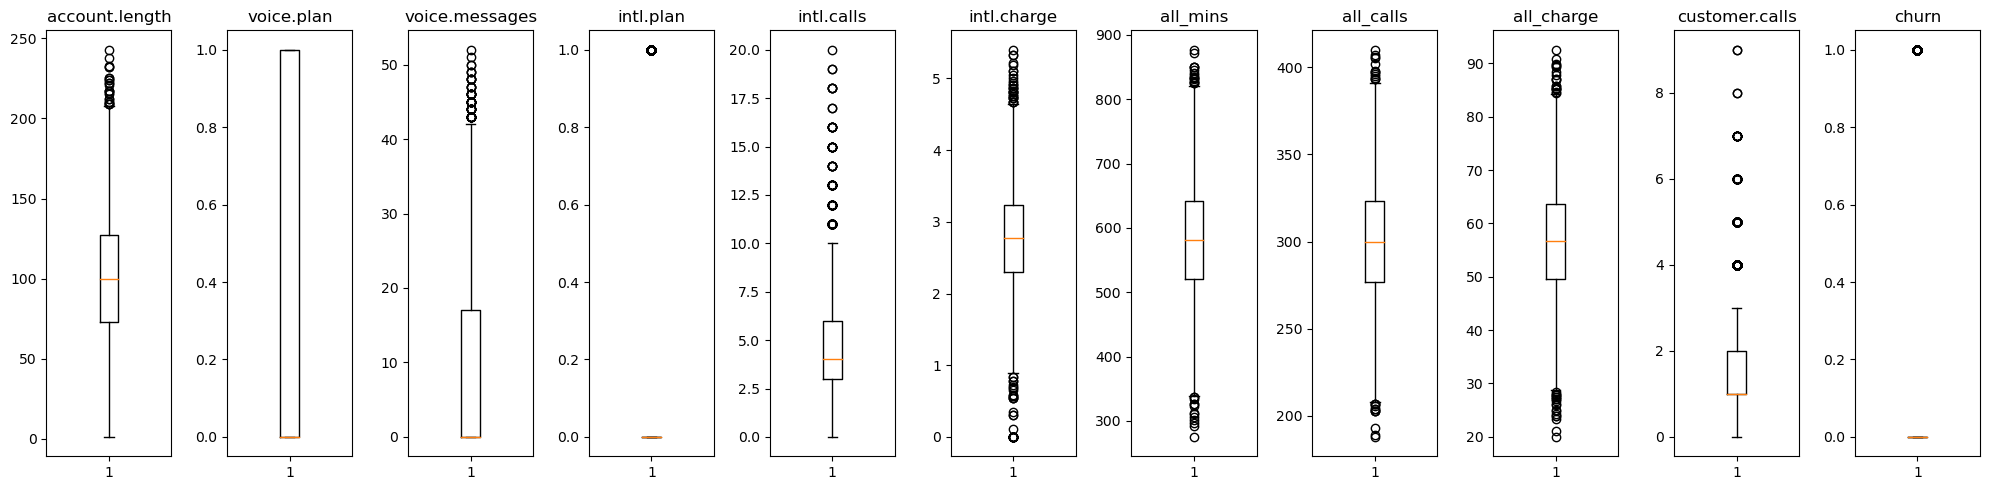

In [92]:
 import pandas as pd
import matplotlib.pyplot as plt



# Plot a box plot for each column
fig, axs = plt.subplots(1, 11, figsize=(20, 5))
axs = axs.ravel()
for i, column in enumerate(churn6.columns):
    axs[i].boxplot(churn6[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

In [94]:
x=churn6.iloc[:,0:-1]
y=churn6.iloc[:,-1]

In [95]:
x

,account.length,voice.plan,voice.messages,intl.plan,intl.calls,intl.charge,all_mins,all_calls,all_charge,customer.calls
0,128,1,25,0,3,2.70,707.2,300,72.86,1
1,107,1,26,0,3,3.70,611.5,329,55.54,1
2,137,0,0,0,5,3.29,527.2,328,59.00,0
3,84,0,0,1,7,1.78,558.2,248,65.02,2
4,75,0,0,1,3,2.73,501.9,356,49.36,3
...,...,...,...,...,...,...,...,...,...,...
4995,50,1,40,0,5,2.67,756.2,369,72.42,2
4996,152,0,0,0,2,3.97,654.6,276,62.75,3
4997,61,0,0,0,4,3.67,525.8,314,48.15,1
4998,109,0,0,0,6,2.30,584.9,248,56.79,0


In [96]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: churn, Length: 4969, dtype: int32

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [98]:
#simple random forest
num_trees = 100
max_features = 10

#train and test
model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
model.fit(x_train,y_train)

pred=model.predict(x_test)

print(classification_report(y_test,pred))


results = cross_val_score(model, x_train, y_train, cv=10)
print(results.mean())

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1383
           1       0.97      0.82      0.89       257

    accuracy                           0.97      1640
   macro avg       0.97      0.91      0.94      1640
weighted avg       0.97      0.97      0.97      1640

0.9744690473606136


In [99]:
#RANDOM FOREST WITH SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Train a random forest classifier on the resampled data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test data
accuracy = rf.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.76%


In [100]:
#Appling gridsearch on RF
from sklearn.model_selection import GridSearchCV

rf_gv = GridSearchCV(estimator= rf, param_grid = { 'criterion' : ["gini", "entropy"],
                                                                   'max_depth' :[2,3,4,5,6,7],
                                                                    'n_estimators':[50,80,100,120,150],
                                                                    'min_samples_split' : [2,3,4,5]                                                                     
                                                                   })
rf_gv.fit(x_train,y_train)

y_pred=rf_gv.predict(x_test)

rf_gv.best_params_


print(rf_gv.best_params_)
print(rf_gv.best_score_)

print(classification_report(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 80}
0.9747680010837906
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1383
           1       0.98      0.81      0.89       257

    accuracy                           0.97      1640
   macro avg       0.97      0.90      0.93      1640
weighted avg       0.97      0.97      0.97      1640



In [101]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [102]:
#APPLYING SVM
clf = SVC(kernel="rbf",gamma=0.0001)

clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

print(classification_report(y_test, y_pred))

Accuracy = 87.3170731707317
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1383
           1       0.86      0.23      0.36       257

    accuracy                           0.87      1640
   macro avg       0.86      0.61      0.65      1640
weighted avg       0.87      0.87      0.84      1640



In [103]:
#APPLYING SVM WITH SMOTE
# Use SMOTE to balance the training data
sm = SMOTE(sampling_strategy='minority', random_state=0)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# Train the SVM model
svm = SVC(kernel='rbf', C=1.0, random_state=0)
svm.fit(X_train_res, y_train_res)

# Make predictions on the testing data
y_pred = svm.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8036585365853659


In [104]:
#Applying Grid search on svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

param = {"C":[50,80,100,120,150],'kernel':["rbf"]}


svm_gv = GridSearchCV(svm,param_grid=param,cv=KFold(n_splits=5))
svm_gv.fit(x_train,y_train)

print("Best parameters: ", svm_gv.best_params_)
print("Best mean cross-validated score: ", svm_gv.best_score_)
y_pred=svm_gv.predict(x_test)

print(classification_report(y_test, y_pred))

Best parameters:  {'C': 150, 'kernel': 'rbf'}
Best mean cross-validated score:  0.8813475129264603
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1383
           1       0.92      0.18      0.31       257

    accuracy                           0.87      1640
   macro avg       0.89      0.59      0.62      1640
weighted avg       0.88      0.87      0.83      1640



In [105]:
#APPLYING RANDOM FOREST
num_trees = 100
max_features = 10

#train and test
model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
model.fit(x_train,y_train)

pred=model.predict(x_test)

print(classification_report(y_test,pred))


results = cross_val_score(model, x_train, y_train, cv=10)
print(results.mean())

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1383
           1       0.97      0.82      0.89       257

    accuracy                           0.97      1640
   macro avg       0.97      0.91      0.94      1640
weighted avg       0.97      0.97      0.97      1640

0.9744690473606136


# pickle file


In [111]:
import pickle
# creating a pickle file
filename = 'Final_draf_kuldeep.sav'
pickle.dump(model,open(filename, 'wb'))

In [112]:
# loading the saved model 
loaded_model = pickle.load(open('Final_draf_kuldeep.sav','rb'))